# Assignment 10

## Try to submit as an HTML file

<font size = "5">
Print your Emory ID below

In [1]:
print("2549430")

2549430


<font size = "5">

Import the "pandas" and "matplotlib.pyplot" libraries.

In [2]:
# Write your answer here:
import matplotlib.pyplot as plt
import pandas as pd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<font size = "5">

In this assignment, we will work with a World Bank <br>
dataset on the proportion of urban population across <br>
countries, from 2016-2020.

- This is an example of a "panel"/"longitudinal" dataset <br>
 which contains information about the same unit (country) <br>
 over time.
 - This is in "long" format (see Lecture 21)

<font size = "5">

(a) Import data and parse dates 

<font size = "3">


- Import "data_raw/wdi_long.csv"
- Create a new column called "date" which uses ```pd.to_datetime(...,format = ...)``` <br>
to convert year to a date format
- To get full points use wild cards to establish the format.

Hint: See Lecture 20 for information about wild cards

In [5]:
# Write your own code
wdi_long = pd.read_csv("data_raw/wdi_long.csv")
wdi_long['date'] = pd.to_datetime(wdi_long["year"], format = "%Y")
display(wdi_long['date'])

0      2016-01-01
1      2016-01-01
2      2016-01-01
3      2016-01-01
4      2016-01-01
          ...    
1080   2020-01-01
1081   2020-01-01
1082   2020-01-01
1083   2020-01-01
1084   2020-01-01
Name: date, Length: 1085, dtype: datetime64[ns]

<font size = "5">

(b)  Sort by two columns

<font size = "3">

- Create a new dataset "data_sorted" that sorts by "country_name" and "date"

HINT: Include a list of column names as the main sorting argument.

In [7]:
# Write your own code
data_sorted = wdi_long.sort_values(by=['country_name', 'date'])
display(data_sorted)

,year,year_code,country_name,country_code,prop_urban,date
0,2016,YR2016,Afghanistan,AFG,25.020,2016-01-01
217,2017,YR2017,Afghanistan,AFG,25.250,2017-01-01
434,2018,YR2018,Afghanistan,AFG,25.495,2018-01-01
651,2019,YR2019,Afghanistan,AFG,25.754,2019-01-01
868,2020,YR2020,Afghanistan,AFG,26.026,2020-01-01
...,...,...,...,...,...,...
216,2016,YR2016,Zimbabwe,ZWE,32.296,2016-01-01
433,2017,YR2017,Zimbabwe,ZWE,32.237,2017-01-01
650,2018,YR2018,Zimbabwe,ZWE,32.209,2018-01-01
867,2019,YR2019,Zimbabwe,ZWE,32.210,2019-01-01


<font size = "5">

(c) Compute within-unit time differences

<font size = "3">

**Example**
- Each country has data for multiple dates
- The following code calculates the time-difference between each date <br>
```
(data_sorted.groupby("country_name")["date"]
            .diff())
```

**Instructions**:
- Now, instead of ["date"] use ```["prop_urban"]```
- Store the result in a new column called "diff_prop_urban"
- This adds a new column with the country-level changes in <br>
the urban propulaton each year

HINT: Check Lecture 21 for using ```.diff()``` <br>
Note: Using ".groupby()" is important so that each country is analyzed <br>
separately.

In [9]:
# Write your own code
data_sorted['diff_prop_urban'] = data_sorted.groupby('country_name')['prop_urban'].diff()
display(data_sorted["diff_prop_urban"])

0         NaN
217     0.230
434     0.245
651     0.259
868     0.272
        ...  
216       NaN
433    -0.059
650    -0.028
867     0.001
1084    0.032
Name: diff_prop_urban, Length: 1085, dtype: float64

<font size = "5">

(d) Plot time series for single country

<font size = "3">

- Use ".query()" to subset "data_sorted" for rows that satisfy

$\quad$  ```  'country_name == "United States"' ```
 
- Produce a line plot with the evolution of "prop_urban" over time in the <br>
United States



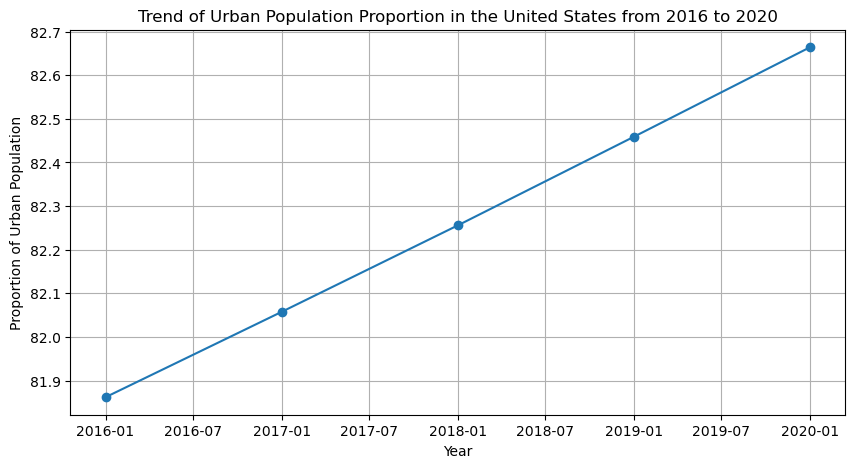

In [17]:
# Write your own code
plt.figure(figsize=(10, 5))
subset_data = data_sorted.query('country_name == "United States"')
plt.plot(subset_data['date'], subset_data['prop_urban'], marker='o')
plt.xlabel("Year")
plt.ylabel("Proportion of Urban Population")
plt.title("Trend of Urban Population Proportion in the United States from 2016 to 2020")
plt.grid(True)
plt.show()

<font size = "5">

(e) Convert to wide format

<font size = "3">

- Convert "data_sorted" from long to wide, using the following arguments: <br>
```
   index = 'country_name'
   columns = 'year'
   values =  'prop_urban'
```
- Display the dataset to check that it is in wide format

HINT: See Lecture 21 for details



In [18]:
# Write your own code
data_wide = (pd.pivot(data_sorted,
                           index = 'country_name',
                           columns = 'year',
                           values =  'prop_urban'))
display(data_wide)

year,2016,2017,2018,2019,2020
country_name,,,,,
Afghanistan,25.020,25.250,25.495,25.754,26.026
Albania,58.421,59.383,60.319,61.229,62.112
Algeria,71.459,72.052,72.629,73.189,73.733
American Samoa,87.198,87.170,87.153,87.147,87.153
Andorra,88.248,88.150,88.062,87.984,87.916
...,...,...,...,...,...
Virgin Islands (U.S.),95.480,95.603,95.721,95.832,95.939
West Bank and Gaza,75.628,75.894,76.164,76.440,76.719
"Yemen, Rep.",35.394,36.016,36.642,37.273,37.908
